In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib notebook

# Random walks 

<IPython.core.display.Javascript object>


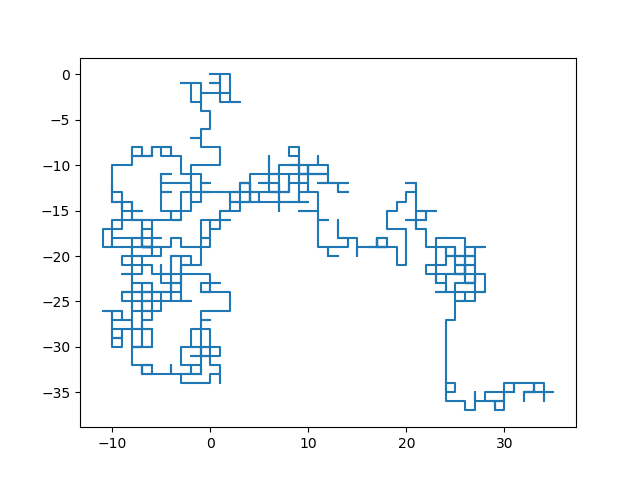

In [45]:
nsteps = 1000
x, y = np.zeros(nsteps), np.zeros(nsteps)

# filling the coordinates with random variables
for i in range(1, nsteps):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
        
fig, ax = plt.subplots()
ax.plot(x,y)
fig.show()

Below is my crude attempt at a random walk without overlap. It is really random walk without revist. I'm not sure if that's the same definition. 

<IPython.core.display.Javascript object>


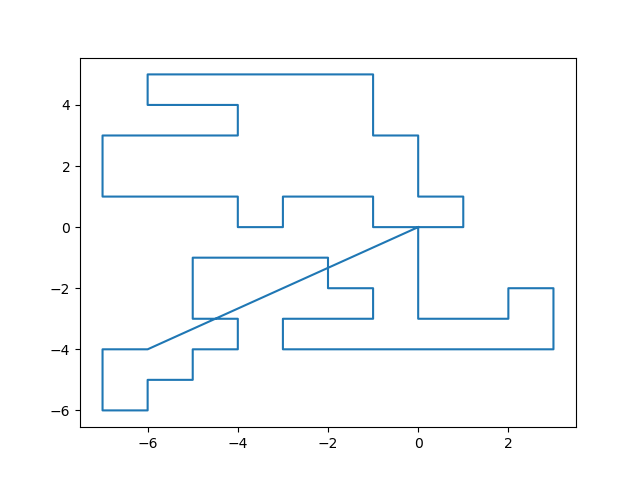

In [34]:
nsteps = 100
x, y = np.zeros(nsteps), np.zeros(nsteps)
visited = set()
# filling the coordinates with random variables
for i in range(1, nsteps):
    tries = 0
    while True:
        #print(i)
        tries += 1
        val = random.randint(1, 4)
        if val == 1:
            xx = x[i - 1] + 1
            yy = y[i - 1]
        elif val == 2:
            xx = x[i - 1] - 1
            yy = y[i - 1]
        elif val == 3:
            xx = x[i - 1]
            yy = y[i - 1] + 1
        else:
            xx = x[i - 1]
            yy = y[i - 1] - 1
        if (xx,yy) not in visited:
            x[i], y[i] = xx, yy
            visited.add((xx,yy))
            break
        if tries > 10:
            break
    if tries > 10:
        break
        
fig, ax = plt.subplots()
ax.plot(x,y)
fig.show()

# Brownian motion

In [37]:
"""
brownian() implements one dimensional Brownian motion (i.e. the Wiener process).
"""

# File: brownian.py

from math import sqrt
from scipy.stats import norm
import numpy as np


def brownian(x0, n, dt, delta, out=None):
    """
    Generate an instance of Brownian motion (i.e. the Wiener process):

        X(t) = X(0) + N(0, delta**2 * t; 0, t)

    where N(a,b; t0, t1) is a normally distributed random variable with mean a and
    variance b.  The parameters t0 and t1 make explicit the statistical
    independence of N on different time intervals; that is, if [t0, t1) and
    [t2, t3) are disjoint intervals, then N(a, b; t0, t1) and N(a, b; t2, t3)
    are independent.
    
    Written as an iteration scheme,

        X(t + dt) = X(t) + N(0, delta**2 * dt; t, t+dt)


    If `x0` is an array (or array-like), each value in `x0` is treated as
    an initial condition, and the value returned is a numpy array with one
    more dimension than `x0`.

    Arguments
    ---------
    x0 : float or numpy array (or something that can be converted to a numpy array
         using numpy.asarray(x0)).
        The initial condition(s) (i.e. position(s)) of the Brownian motion.
    n : int
        The number of steps to take.
    dt : float
        The time step.
    delta : float
        delta determines the "speed" of the Brownian motion.  The random variable
        of the position at time t, X(t), has a normal distribution whose mean is
        the position at time t=0 and whose variance is delta**2*t.
    out : numpy array or None
        If `out` is not None, it specifies the array in which to put the
        result.  If `out` is None, a new numpy array is created and returned.

    Returns
    -------
    A numpy array of floats with shape `x0.shape + (n,)`.
    
    Note that the initial value `x0` is not included in the returned array.
    """

    x0 = np.asarray(x0)

    # For each element of x0, generate a sample of n numbers from a
    # normal distribution.
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))

    # If `out` was not given, create an output array.
    if out is None:
        out = np.empty(r.shape)

    # This computes the Brownian motion by forming the cumulative sum of
    # the random samples. 
    np.cumsum(r, axis=-1, out=out)

    # Add the initial condition.
    out += np.expand_dims(x0, axis=-1)

    return out

<IPython.core.display.Javascript object>


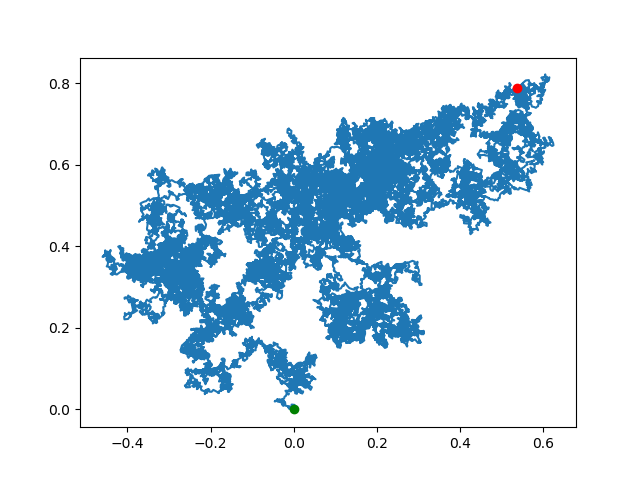

In [44]:
import numpy
from pylab import plot, show, grid, axis, xlabel, ylabel, title

# The Wiener process parameter.
delta = 0.25
# Total time.
T = 10.0
# Number of steps.
N = 50000
# Time step size
dt = T/N
# Initial values of x.
x = numpy.empty((2,N+1))
x[:, 0] = 0.0

brownian(x[:,0], N, dt, delta, out=x[:,1:])

fig, ax = plt.subplots()
# Plot the 2D trajectory.
ax.plot(x[0],x[1])

# Mark the start and end points.
ax.plot(x[0,0],x[1,0], 'go')
ax.plot(x[0,-1], x[1,-1], 'ro')

fig.show()